In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Loading the image

In [10]:
# Loads a grayscale PPM image as a NumPy matrix. Don't worry about understanding how this code block works!
def readPPM(filename):
    f = open(filename, mode="rb") # Open the file for binary data.
    header = f.readline().split()
    if header[0] != b"P6": raise Exception("Not a valid PPM image file!")
    width = int(header[1])
    height = int(header[2])
    pixels = np.frombuffer(f.read(), dtype=np.uint8) # Read the pixel bytes into a NumPy array.
    f.close()

    # Shape the array into a matrix that represents the grayscale image.
    # The PPM pixels use RGB colors, so take just 1 out of every 3 elements.
    return np.reshape(pixels[np.arange(0, pixels.size, 3)], [height, width]).astype(float)

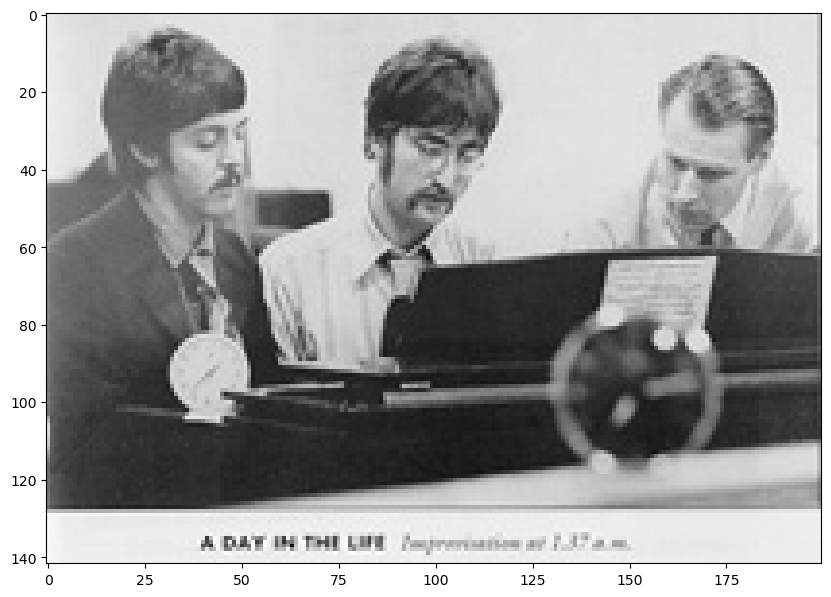

In [11]:
# Read the desired PPM image and transform it into a NumPy (Numerical Python) matrix.
# Note that the indices in NumPy start at 0, not 1, as is always the case in Python.
image = readPPM("BEATLES.PPM")
# Show the image.
plt.figure(figsize = (10,10)) # Change (10,10) to, say, (12,12) if you want a larger printout
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Functions for image processing

In [12]:
def SecDerX(pict,i,j,delx): # Computes the 2nd derivative in x
    return (pict[j,i-1]-2*pict[j,i]+pict[j,i+1])/(delx**2)

def SecDerY(pict,i,j,dely): # Computes the 2nd derivative in y
    return (pict[j-1,i]-2*pict[j,i]+pict[j+1,i])/(dely**2)

# Code for transforming the image

WARNING: Apparently, someone who never took a math class with graphs before was in charge of graphing software. How do we know this? Two reasons: 1) The y coordinate comes *before* the x coordinate (although that actually fits with matrix notation!) and 2) An increase in the y coordinate corresponds to moving downward, not upward, in the vertical direction. 

So be careful!

In [37]:
height = np.shape(image)[0] # vertical length of the image (y axis)
length = np.shape(image)[1] # horizontal length of the image (x axis)

T = 1 # Final time
h = .1 # Delta t Note: CFL requires h <= 0.5 in theory, but choosing h too near to 0.5 leads to problems. 
N = int(T/h) # number of time iterations
delta_x = 1.0
delta_y = 1.0

Newpict = copy.deepcopy(image)  # Newpict is a copy of image. If you don't use the deepcopy command, changes
                                # to Newpict will change the original image as well.

for t in range(N):
    Oldpict = copy.deepcopy(Newpict) # Use a copy of the old data, as the new data gets overwritten.
    for x in range(1,length-1):
        for y in range(1,height-1):
            Newpict[y,x] = Oldpict[y,x] + h*(SecDerX(Oldpict,x,y,delta_x) + SecDerY(Oldpict,x,y,delta_y))
            

# Plotting the resulting image

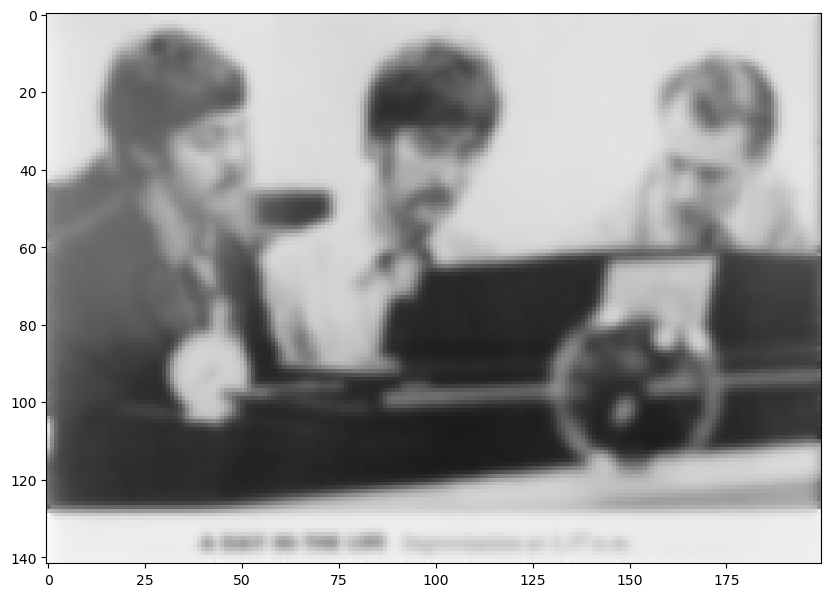

In [38]:
plt.figure(figsize = (10,10))
plt.imshow(Newpict, cmap='gray', vmin=0, vmax=255)